
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 - polynomial regression <br>
<font color=696880 size=4>
Ali Rahimi Akbar

____

#Personal Data

In [1]:
# Set your student number and name
student_number = '401106617'
Name = 'Alireza'
Last_Name = 'Mirrokni'

## Introduction
This exercise explores polynomial regression, a form of regression analysis where the relationship between the independent variable \( X \) and the dependent variable \( y \) is modeled as an \( n \)th degree polynomial. We will create a synthetic dataset, train models with varying degrees of polynomials, and evaluate their performance on different test sets.


## 1. Create a synthetic dataset (20 Points)
First, define a function to generate a dataset with 1000 samples in the range of **-3 to -1** from a polynomial with added noise. Assume that the noise is from a normal distribution and has a mean of 0 and std of 5.

The relationship between the independent variable \( X \) and the dependent variable \( y \) is given by the following equation:

\[ y = 0.1X^6 - 2X^3 + 7X^2 - 9X + 3 \]

Generate the independent variable \( X \) using the `numpy` library and then calculate the dependent variable \( y \) using the given equation.

In [2]:
import numpy as np

def generate_dataset(range_start, range_end, num_samples, noise_std=5.0):
    
    # TODO
    X = np.random.uniform(range_start, range_end, num_samples)
    y = 0.1 * (X ** 6) - 2 * (X ** 3) + 7 * (X ** 2) - 9 * X + 3
    noise = np.random.normal(0, noise_std, num_samples)

    return X, y + noise

X, y = generate_dataset(-3, -1, 1000) 

## 2. Splitting the Dataset (5 Points)
Split the dataset into training and two test sets with the same length, ensuring one test set is in the range of the training data and the other is in the **range of 4 to 6.**

In [3]:
from sklearn.model_selection import train_test_split

#TODO
X_train, X_test_1, y_train, y_test_1 = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_test_2, y_test_2 = generate_dataset(4, 6, 300)

## 3. Polynomial Regression Training (30 Points)
Train polynomial regression models of varying degrees from degree = 2 to degree = 12. You can't use sklearn library for this section

In [4]:
import math as mt

class PolynomailRegression() :

    def __init__( self, degree, learning_rate = 0.05, iterations = 5000) :

        # initialize  model
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.coefficients = None

    def fit( self, X, y ) :

        # input : X and Y for fit model with gradient descent and return Self
        data_size = len(X)
        mx_data = max(X)
        mn_data = min(X)
        X = (X - mx_data) / (mn_data - mx_data)
        X_poly = np.zeros((data_size, self.degree + 1))
        self.coefficients = np.random.uniform(-1, 1, self.degree + 1)

        for i in range(self.degree + 1):
            X_poly[:, i] = X ** i

        for iter in range(self.iterations):
            error = X_poly @ self.coefficients - y
            gradient = X_poly.T @ (error / data_size)
            self.coefficients -= self.learning_rate * gradient

        for i in range(self.degree + 1):
            self.coefficients[i] /= (mn_data - mx_data) ** i
            self.coefficients[i] += sum((((-1) ** (j - i)) * self.coefficients[j] * (mx_data ** (j - i)) * mt.comb(j, j - i)) / (mn_data - mx_data) ** j for j in range(i + 1, self.degree + 1))


    # predict

    def predict( self, X ) :

        # Get X and return predicted value from model
        data_size = len(X)
        X_poly = np.zeros((data_size, self.degree + 1))
        
        for i in range(self.degree + 1):
            X_poly[:, i] = X ** i

        return X_poly @ self.coefficients

degrees = range(2, 13)
models = {}
for degree in degrees:
    models[degree] = PolynomailRegression(degree)
    models[degree].fit(X_train, y_train)

## 4. Model Evaluation (15 Points)
Evaluate the models on both train and test sets using MSE. You can use the `mean_squared_error` from `sklearn.metrics`.

In [5]:
from sklearn.metrics import mean_squared_error

def evaluate_models(models, X_test, y_test):
    # TODO
    MSEs = {}

    for degree in degrees:
        y_pred = models[degree].predict(X_test)
        MSEs[degree] = mean_squared_error(y_test, y_pred)

    return MSEs

MSE_train = evaluate_models(models, X_train, y_train)
MSE_test_1 = evaluate_models(models, X_test_1, y_test_1)
MSE_test_2 = evaluate_models(models, X_test_2, y_test_2)

for degree in degrees:
    print('polynomial degree =', degree, ', MSE train =', MSE_train[degree], ', MSE test 1 =', MSE_test_1[degree], ', MSE test 2 =', MSE_test_2[degree])

polynomial degree = 2 , MSE train = 46.056805376389256 , MSE test 1 = 43.59598606955047 , MSE test 2 = 972745.6062503791
polynomial degree = 3 , MSE train = 24.766269965967293 , MSE test 1 = 24.66101579828499 , MSE test 2 = 14839044.437112749
polynomial degree = 4 , MSE train = 22.465100229463168 , MSE test 1 = 23.751481575344574 , MSE test 2 = 1319925.8635081653
polynomial degree = 5 , MSE train = 22.082463587349874 , MSE test 1 = 23.880213170729917 , MSE test 2 = 45936691.67457272
polynomial degree = 6 , MSE train = 22.051482613165394 , MSE test 1 = 23.992868015112517 , MSE test 2 = 18849194.33494426
polynomial degree = 7 , MSE train = 22.05502577586945 , MSE test 1 = 24.0128476306172 , MSE test 2 = 77475917.59130569
polynomial degree = 8 , MSE train = 22.054608154208967 , MSE test 1 = 23.99963005805864 , MSE test 2 = 68981052.75889674
polynomial degree = 9 , MSE train = 22.05331484876511 , MSE test 1 = 23.98608360726431 , MSE test 2 = 1103702105.0077963
polynomial degree = 10 , MSE 

## 5. Plotting your predicted polynomial function

plot your predicted function at degree 5 and 6 and 7 and the base function from question in range -3 to -1.

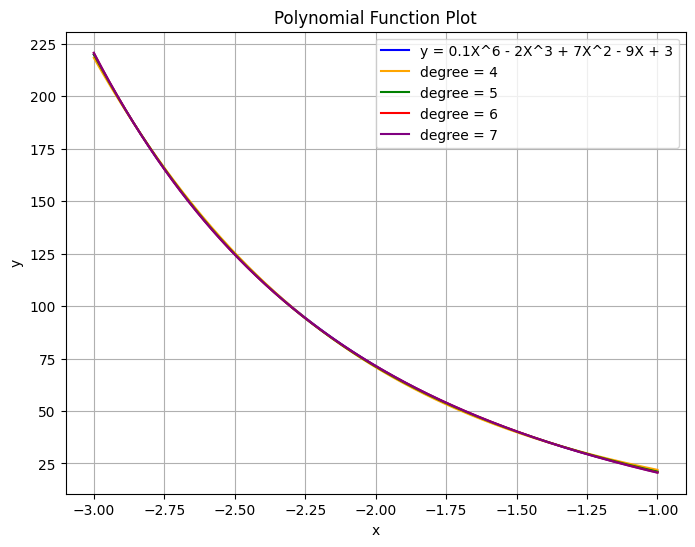

In [6]:
# TODO
import matplotlib.pyplot as plt

x_values = (np.array(range(501)) / 250) - 3
y_base_function = 0.1 * (x_values ** 6) - 2 * (x_values ** 3) + 7 * (x_values ** 2) - 9 * x_values + 3
y_degree_4 = models[4].predict(x_values)
y_degree_5 = models[5].predict(x_values)
y_degree_6 = models[6].predict(x_values)
y_degree_7 = models[7].predict(x_values)

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_base_function, color = 'blue', label = 'y = 0.1X^6 - 2X^3 + 7X^2 - 9X + 3')
plt.plot(x_values, y_degree_4, color = 'orange', label = 'degree = 4')
plt.plot(x_values, y_degree_5, color = 'green', label = 'degree = 5')
plt.plot(x_values, y_degree_6, color = 'red', label = 'degree = 6')
plt.plot(x_values, y_degree_7, color = 'purple', label = 'degree = 7')

plt.title('Polynomial Function Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

## 6. Plotting Model Scores (20 Points)

Now to evaluate the performance of the polynomial regression models, plot the **logarithm** of losses of the training and test sets based on the model degree varying from 2 to 12.

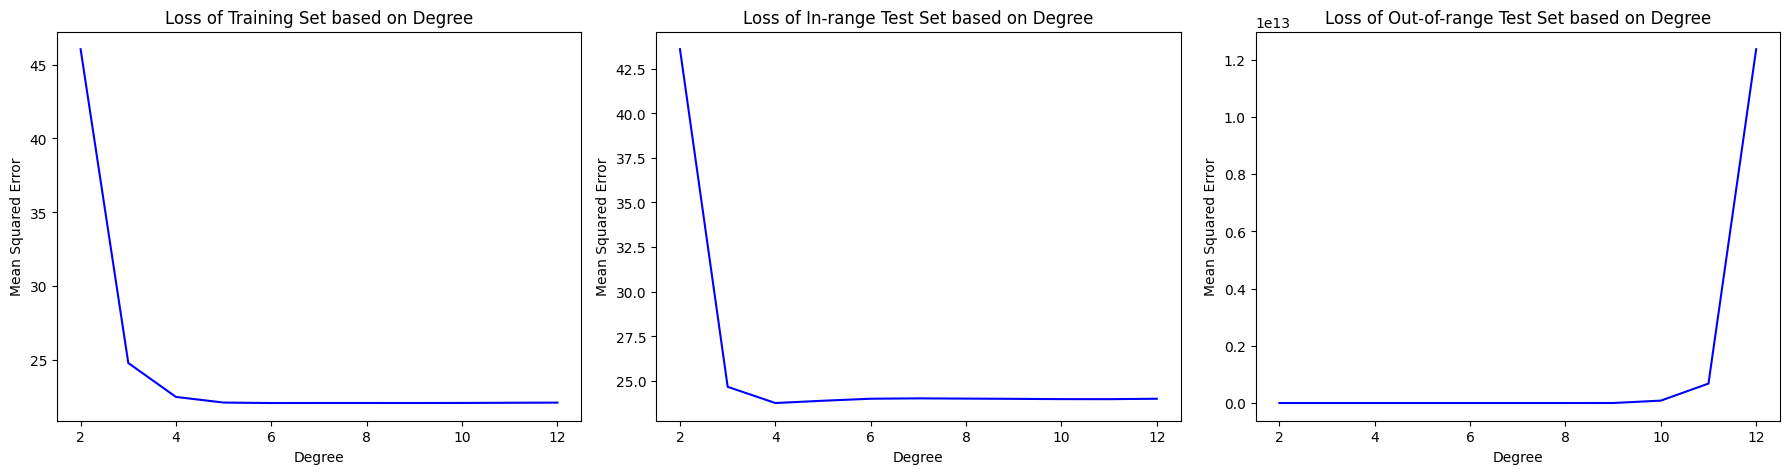

In [11]:
#TODO
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

MSEs_train = np.array([MSE_train[degree] for degree in degrees])
MSEs_test_1 = np.array([MSE_test_1[degree] for degree in degrees])
MSEs_tset_2 = np.array([MSE_test_2[degree] for degree in degrees])

axes[0].plot(degrees, MSEs_train, label = 'Training Set', color = 'blue')
axes[0].set_title('Loss of Training Set based on Degree')
axes[0].set_xlabel('Degree')
axes[0].set_ylabel('Mean Squared Error')

axes[1].plot(degrees, MSEs_test_1, label = 'In-range Test Set', color = 'blue')
axes[1].set_title('Loss of In-range Test Set based on Degree')
axes[1].set_xlabel('Degree')
axes[1].set_ylabel('Mean Squared Error')

axes[2].plot(degrees, MSEs_tset_2, label = 'Out-of-range Test Set', color = 'blue')
axes[2].set_title('Loss of Out-of-range Test Set based on Degree')
axes[2].set_xlabel('Degree')
axes[2].set_ylabel('Mean Squared Error')

fig.tight_layout()
plt.show()

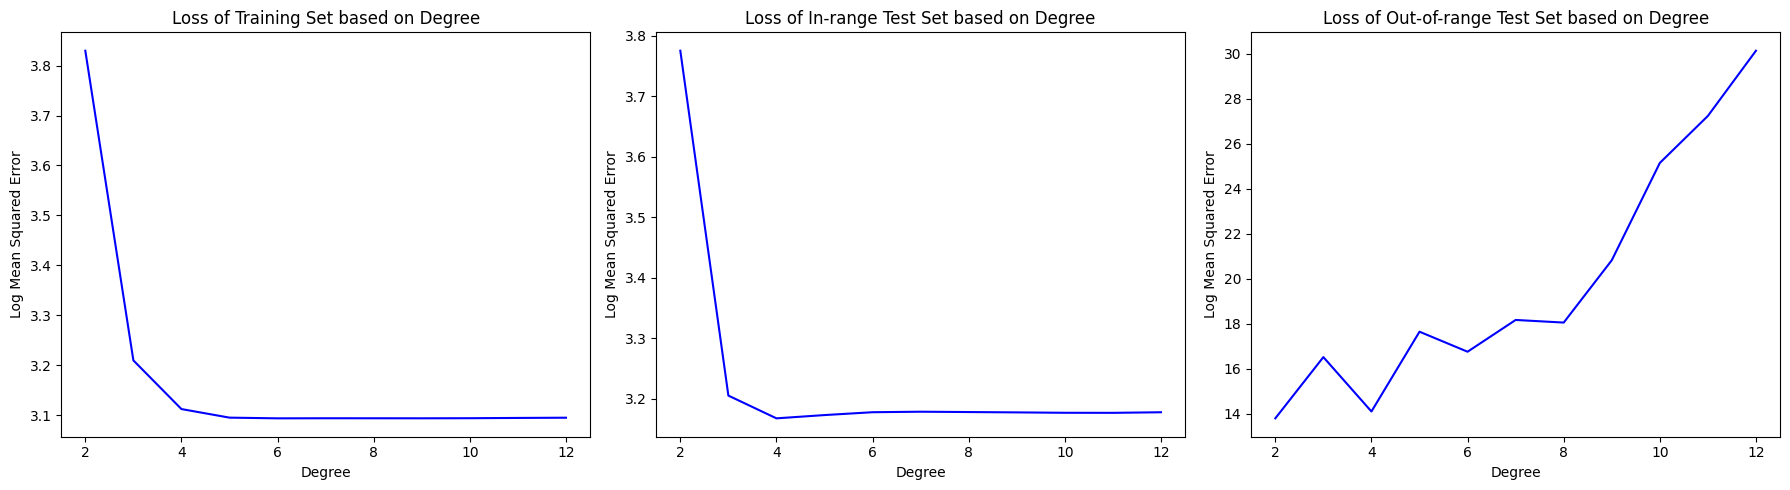

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

axes[0].plot(degrees, np.log(MSEs_train), label = 'Training Set', color = 'blue')
axes[0].set_title('Loss of Training Set based on Degree')
axes[0].set_xlabel('Degree')
axes[0].set_ylabel('Log Mean Squared Error')

axes[1].plot(degrees, np.log(MSEs_test_1), label = 'In-range Test Set', color = 'blue')
axes[1].set_title('Loss of In-range Test Set based on Degree')
axes[1].set_xlabel('Degree')
axes[1].set_ylabel('Log Mean Squared Error')

axes[2].plot(degrees, np.log(MSEs_tset_2), label = 'Out-of-range Test Set', color = 'blue')
axes[2].set_title('Loss of Out-of-range Test Set based on Degree')
axes[2].set_xlabel('Degree')
axes[2].set_ylabel('Log Mean Squared Error')

fig.tight_layout()
plt.show()

## Conclusion (10 Points)
With comparing the loss of **training set and the test set** specially in higher degrees, what we can conclude about the bias - variance trade off?

the bias–variance tradeoff describes the relationship between a model's complexity, the accuracy of its predictions, and how well it can make predictions on previously unseen data that were not used to train the model

in this specific example, as the degree of the polynomial increases, the bias decreases and the variance increases. a lower degree polynomial (e.g. degree 2) tends to have higher bias but lower variance, while a higher degree polynomial (e.g. degree 12) tends to have lower bias but higher variance. this trade-off suggests that a balance needs to be stقuck between bias and variance when selecting the degree of the polynomial for a regression model. this balance is important to avoid overfitting (high variance) or underfitting (high bias) the training data. in our case, polynomial models of degreeس 5 and 6 strike this balance and are the best choises for training our model.

in addition, as we can see in the above figures, if our choise for the degree of the regression model turns to be improper; we will observe large amount of loss in the test data and our model will not be generalizable for out-of-training samples